
### Описание датасета (из документации):
*This database encodes the complete set of possible board configurations
at the end of tic-tac-toe games, where "x" is assumed to have played
first.  The target concept is "win for x" (i.e., true when "x" has one
of 8 possible ways to create a "three-in-a-row").*

*Attribute Information: (x=player x has taken, o=player o has taken, b=blank)*

    1. top-left-square: {x,o,b}
    2. top-middle-square: {x,o,b}
    3. top-right-square: {x,o,b}
    4. middle-left-square: {x,o,b}
    5. middle-middle-square: {x,o,b}
    6. middle-right-square: {x,o,b}
    7. bottom-left-square: {x,o,b}
    8. bottom-middle-square: {x,o,b}
    9. bottom-right-square: {x,o,b}
    10. Class: {positive,negative}

# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [1 балл] Загрузите датасет, указав, что header равен None, так как первая строка не является строкой с названиями переменных. Посмотрите на начало датасета при помощи `.head()`. 
2. [1 балл] Похоже, нужно основательно поработать с датасетом, так как нет ни названий столбцов, ни нормальных числовых переменных. Давайте начнем со столюцов - переименуйте их на 'topleft', 'topmiddle', 'topright','middleleft', 'middlemiddle', 'middleright','bottomleft', 'bottommiddle', 'bottomright','Class' (именно в таком порядке) и снова посмотрите на начало датасета.
3. [3 балла] Отлично, теперь стало уже приятнее, но по-прежнему беда с переменными. Давайте их все перекодируем в числа. Задайте в качестве иксов единички, пустым значениям поставьте в соответствие нолики, а нолики замените на минус единички. Аналогично поработаем с целевой переменной - Class, которая отвечает за победу или поражение крестиков. В качестве positive поставьте единички, а negative - нули.
4. [1 балл] Наконец, после всех этих преобразований, посчитайте, сколько в датасете случаев, когда крестики проиграли, а также воспользуйтесь функцией describe() для отображения базовых статистик переменных.
5. [2 балла] В какую клетку чаще всего ставят крестики? Подсказка - это можно подсчитать при помощи count(), примененному к соответствующему срезу датасета. А какая клетка чаще всего оказывается не пустой на доске? (То есть в датасете в этом столбце реже всего встречается пустое значение - ноль)
6. [1 балл] Визуализация - при помощи функции plotBoard постройте по несколько примеров для случаев, когда победили крестики, и когда победили нолики
7. [1 балл] Вопрос-сюрприз! Попробуйте самостоятельно придумать какой-нибудь осмысленный вопрос или визуализацию для вашего датасета. Инициатива не наказуема, так что удивите меня ;)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
tic = pd.read_csv('./egorova_tic-tac-toe.txt', header = None)

In [3]:
tic.head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [16]:
names = ['topleft',
 'topmiddle',
 'topright',
 'middleleft',
 'middlemiddle',
 'middleright',
 'bottomleft',
 'bottommiddle',
 'bottomright',
 'Class']

dict(enumerate(names))

{0: 'topleft',
 1: 'topmiddle',
 2: 'topright',
 3: 'middleleft',
 4: 'middlemiddle',
 5: 'middleright',
 6: 'bottomleft',
 7: 'bottommiddle',
 8: 'bottomright',
 9: 'Class'}

In [35]:
tic.rename(columns=dict(enumerate(names)), inplace=True)

In [36]:
tic.head()

,topleft,topmiddle,topright,middleleft,middlemiddle,middleright,bottomleft,bottommiddle,bottomright,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [37]:
tic[tic=='x'] = 1
tic[tic=='b'] = 0
tic[tic=='o'] = -1
tic[tic=='positive'] = 1
tic[tic=='negative'] = 0


In [38]:
tic.head()

,topleft,topmiddle,topright,middleleft,middlemiddle,middleright,bottomleft,bottommiddle,bottomright,Class
0,1,1,1,1,-1,-1,1,-1,-1,1
1,1,1,1,1,-1,-1,-1,1,-1,1
2,1,1,1,1,-1,-1,-1,-1,1,1
3,1,1,1,1,-1,-1,-1,0,0,1
4,1,1,1,1,-1,-1,0,-1,0,1


In [32]:
tic['Class'].value_counts()

1    626
0    332
Name: Class, dtype: int64

In [110]:
tic.describe()

,topleft,topmiddle,topright,middleleft,middlemiddle,middleright,bottomleft,bottommiddle,bottomright,Class
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,1,1,1,1,1,1,1,1,1,1
freq,418,378,418,378,458,378,418,378,418,626


In [122]:
tic[tic==1].count()


topleft         418
topmiddle       378
topright        418
middleleft      378
middlemiddle    458
middleright     378
bottomleft      418
bottommiddle    378
bottomright     418
Class           626
dtype: int64

In [ ]:
#В клетку middlemiddle крестик ставили чаще всего!

In [123]:
tic[tic!=0].count()

topleft         753
topmiddle       708
topright        753
middleleft      708
middlemiddle    798
middleright     708
bottomleft      753
bottommiddle    708
bottomright     753
Class           626
dtype: int64

In [ ]:
#Клетка middlemiddle чаще всего была не пустая!

In [124]:
def plotBoard(row_number, ax, markersize=50, title=True):
    
    board =  tic.iloc[row_number]
    # positions for ticks and toes
    coords = {
        'topleft': (0.5, 2.5),
        'topmiddle':(1.5, 2.5),
        'topright':(2.5, 2.5),
        'middleleft':(0.5, 1.5),
        'middlemiddle':(1.5, 1.5),
        'middleright':(2.5, 1.5),
        'bottomleft':(0.5, 0.5),
        'bottommiddle':(1.5, 0.5),
        'bottomright':(2.5, 0.5)
    }
    
    # draw the grid
    for x in range(4):
        ax.plot([x, x], [0,3], 'k')
    for y in range(4):
        ax.plot([0, 3], [y,y], 'k')


    # get rid of axes and everything (the figure background will show through)
    ax.set_axis_off()

    # scale the plot area 
    ax.set_xlim(0,3)
    ax.set_ylim(0,3)

    # iteratively fill the board
    for index, value in board[:-1].items():
        if value == 1:
            ax.plot(*coords[index],'X',markersize=markersize, markeredgecolor=(0,0,0), markerfacecolor='black', markeredgewidth=2)
        elif value == -1:
            ax.plot(*coords[index],'o',markersize=markersize, markeredgecolor=(0,0,0), markerfacecolor='w', markeredgewidth=2)
    
    if title:
        if board[-1] == 1:
            ax.set_title("Победили крестики")
        else:
            ax.set_title("Победили нолики")

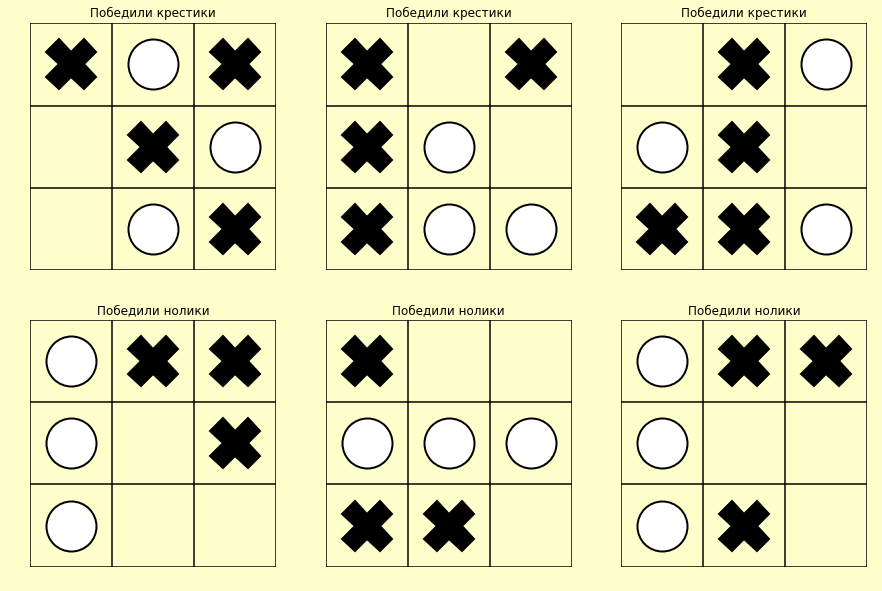

In [125]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.patch.set_facecolor((1,1,.8))

set1 = tic[tic['Class']==1].sample(3).index
for i in range(3):
    plotBoard(set1[i], axes[0, i])
    
set0 = tic[tic['Class']==0].sample(3).index
for i in range(3):
    plotBoard(set0[i], axes[1, i])

## Самые быстрые партии

In [126]:
count_b = tic[tic==0].iloc[:,:-1].count(axis=1)
count_b_ind = count_b[count_b==4].index
count_b_ind

Int64Index([ 33,  43,  47,  48,  49,  62,  66,  67,  68,  72,
            ...
            613, 617, 618, 619, 620, 621, 622, 623, 624, 625],
           dtype='int64', length=120)

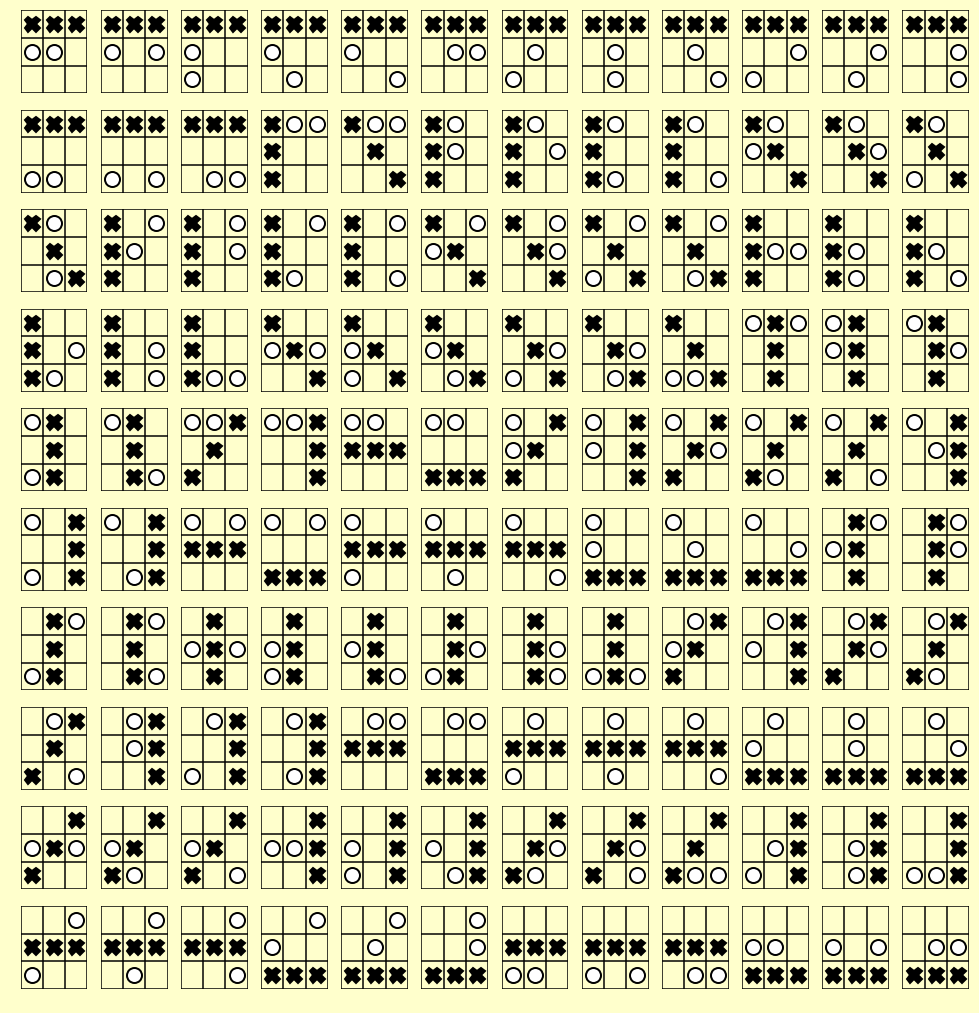

In [109]:
fig, axes = plt.subplots(10, 12, figsize=(17, 18))
fig.patch.set_facecolor((1,1,.8))
axes = axes.flatten()
for i in range(len(count_b_ind)):
    plotBoard(count_b_ind[i], axes[i], markersize=15, title=False)